In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [7]:
# Importing the Dataset
# Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
data = pd.read_csv("winequality-white.csv", delimiter=";")

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [12]:
# Categorizing data into numerical and categorical data
num_data = data.columns
cat_data = ["quality"]

In [22]:
# Frequency Distribution of Categorical Data

attribute = "quality"
freq_dist = dict.fromkeys(data[attribute].unique(), 0)
for a in range(len(data[attribute])):
    freq_dist[data[attribute][a]] += 1
    
print("Attribute:", attribute)
for val in data[attribute].unique():
    print(val, ":", freq_dist[val])
print()
print("-----------------------------")
print()

Attribute: quality
6 : 2198
5 : 1457
7 : 880
8 : 175
4 : 163
3 : 20
9 : 5

-----------------------------



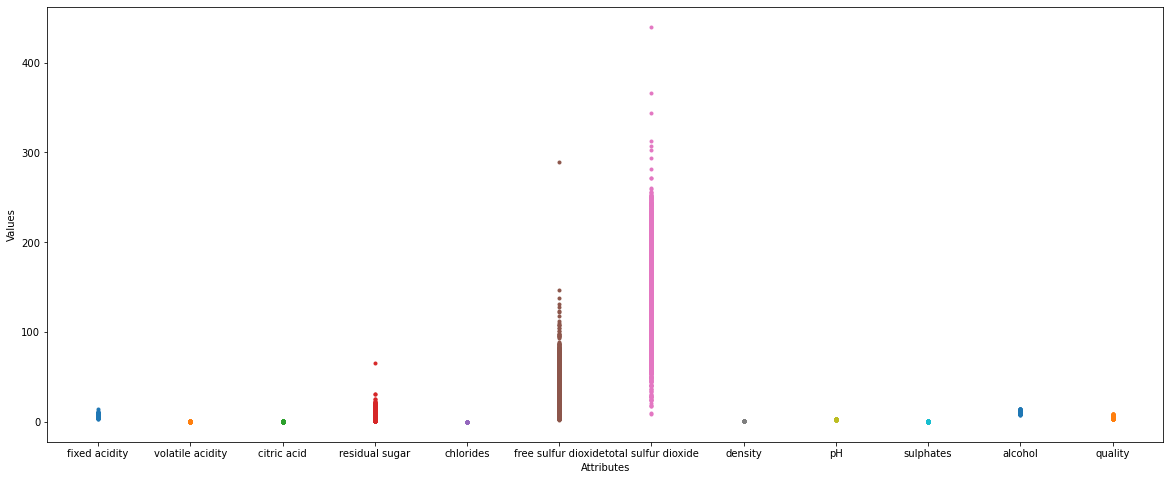

In [23]:
# Graphical frequency distribution of Numerical Attributes 
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(8)
for a in range(len(num_data)):
    plt.plot(len(data[num_data[a]]) * [a], data[num_data[a]], ".")
    
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([a for a in range(len(num_data))], num_data)
plt.show()

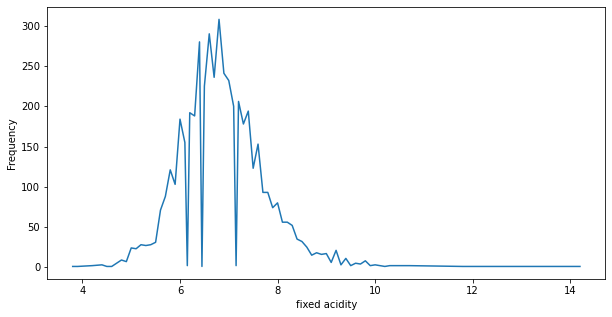

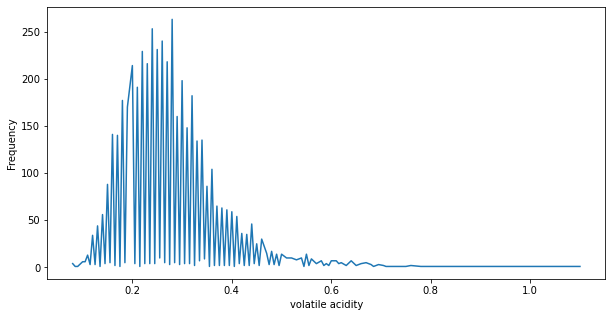

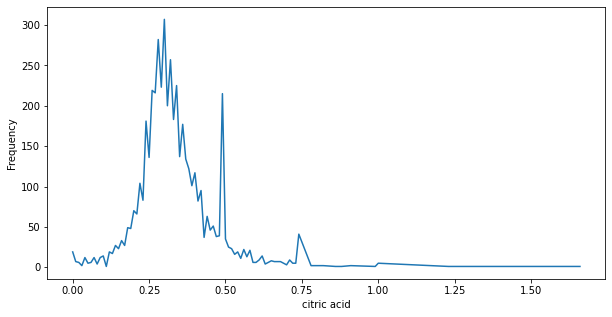

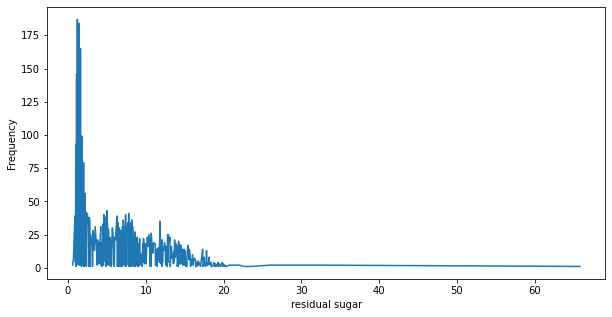

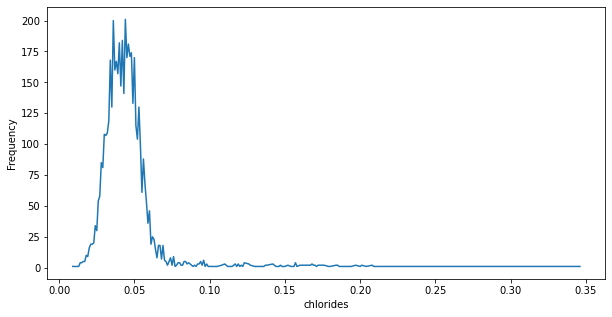

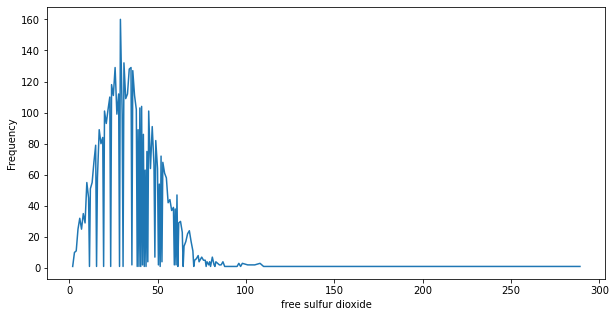

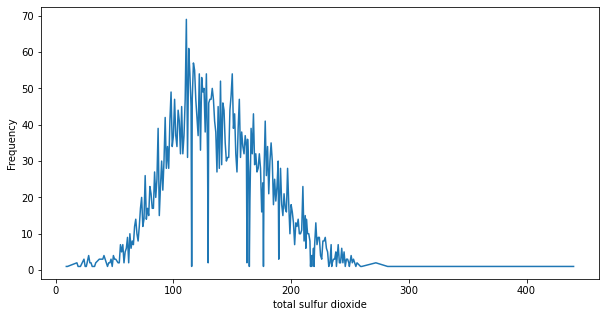

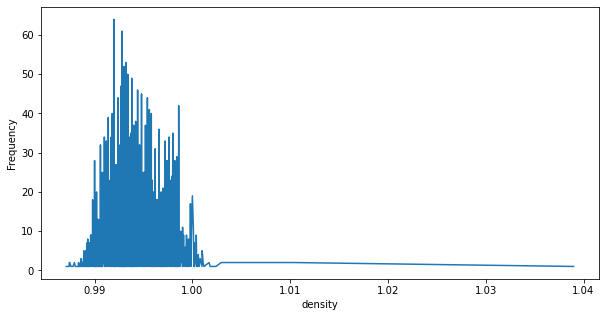

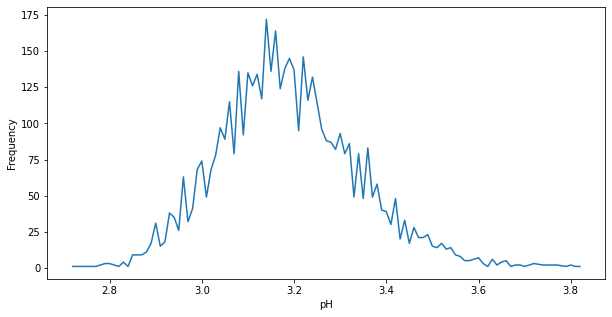

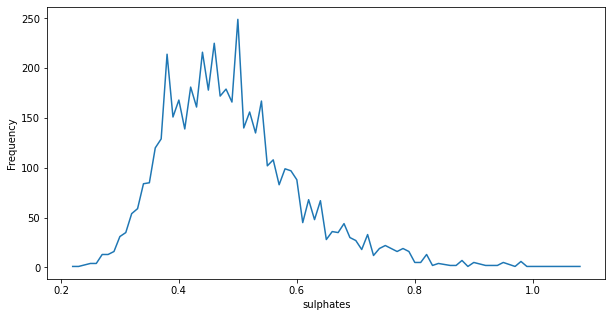

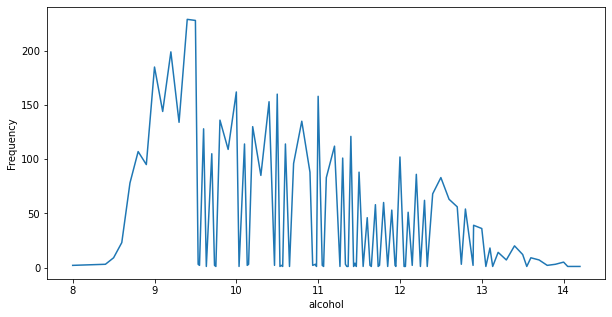

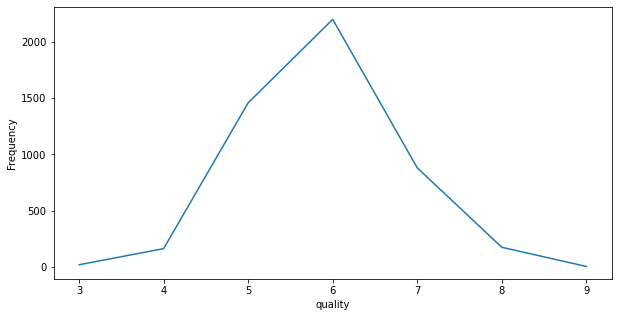

In [24]:
# Frequncy Distribution of each numerical attribute

for attribute in num_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
        
    x = sorted(data[attribute].unique())
    y = [freq_dist[val] for val in x]
    f = plt.figure() 
    f.set_figwidth(10) 
    f.set_figheight(5)
    plt.plot(x, y)
    plt.ylabel("Frequency")
    plt.xlabel(attribute)
    plt.show()


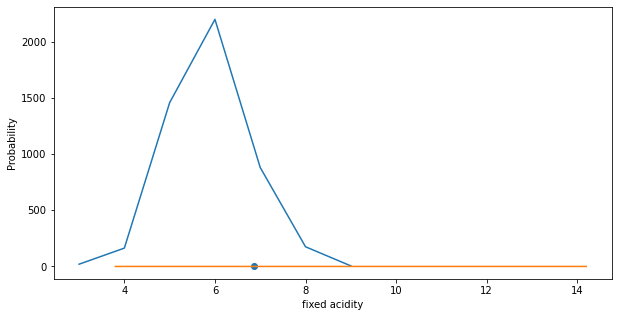

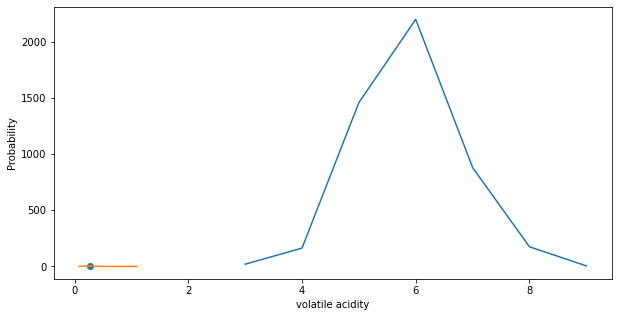

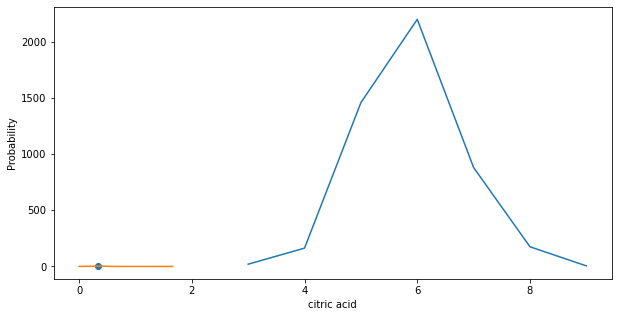

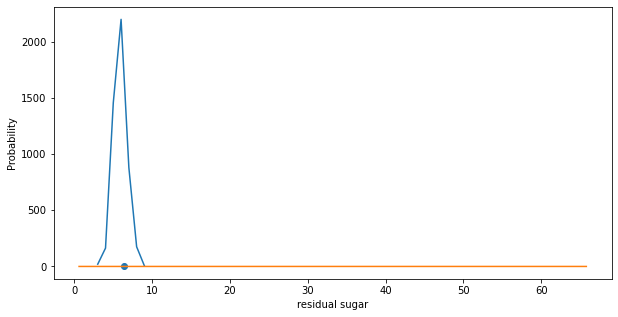

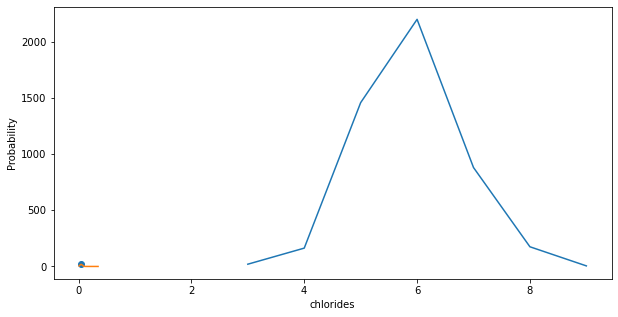

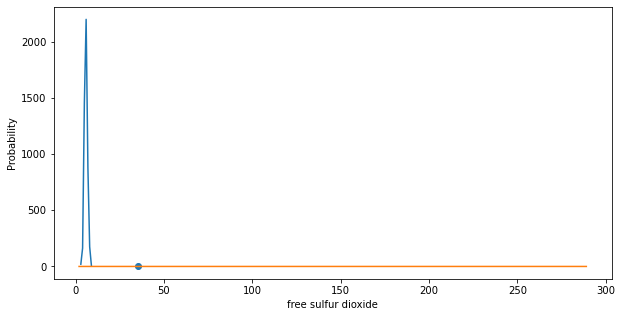

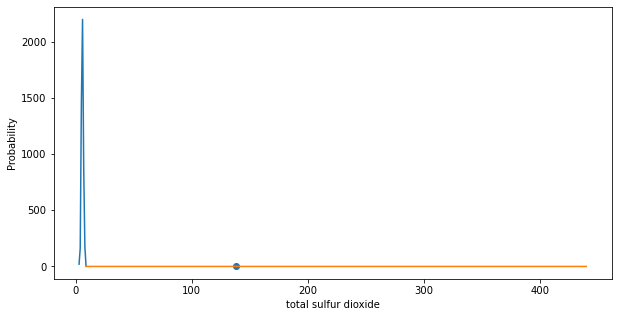

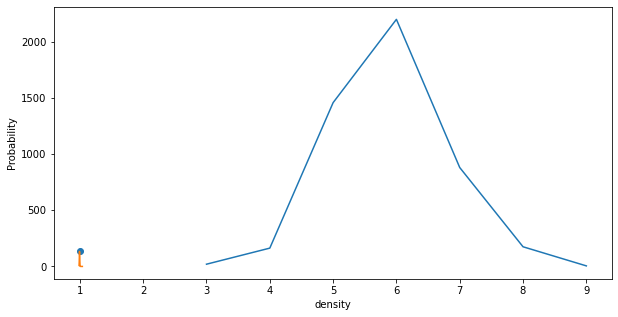

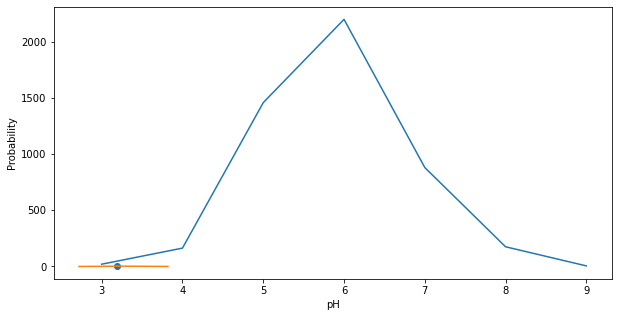

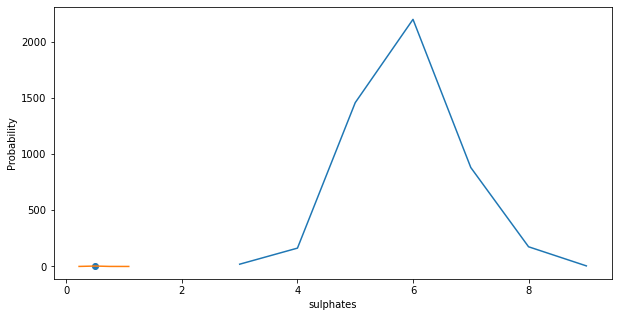

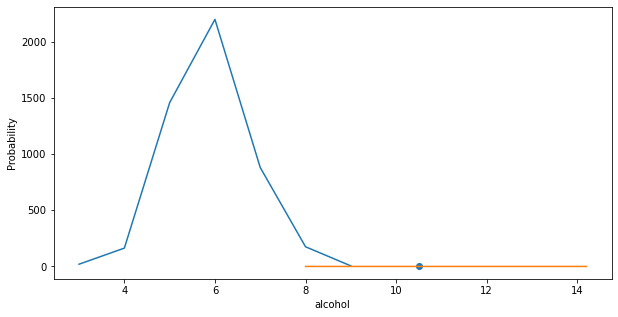

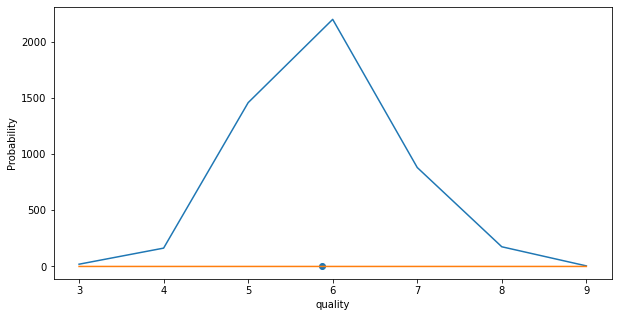

In [26]:
# Normal Distributions
for attribute in num_data:
    arr = sorted(data[attribute])
    mean = np.mean(arr)
    std = np.std(arr)
    pdf = stats.norm.pdf(arr, mean, std)
    f = plt.figure()
    f.set_figwidth(10) 
    f.set_figheight(5)
    plt.plot(x, y)
    plt.plot(arr, pdf)
    plt.scatter(mean, stats.norm.pdf(mean, mean, std))
    plt.ylabel("Probability")
    plt.xlabel(attribute)
    plt.show()

In [27]:
# Measures of Central Tendency

Central = pd.DataFrame(num_data, columns=["Attribute"])
Central["Arithmetic Mean"] = [data[column].mean() for column in num_data]
Central["Mode"] = [data.mode().iloc[0][column] for column in num_data]
Central["Lower Quartile"] = [data[column].quantile(0.25) for column in num_data]
Central["Median"] = [data[column].median() for column in num_data]
Central["Upper Quartile"] = [data[column].quantile(0.75) for column in num_data]

Central.head(len(num_data))

,Attribute,Arithmetic Mean,Mode,Lower Quartile,Median,Upper Quartile
0,fixed acidity,6.854788,6.800,6.300000,6.80000,7.3000
1,volatile acidity,0.278241,0.280,0.210000,0.26000,0.3200
2,citric acid,0.334192,0.300,0.270000,0.32000,0.3900
3,residual sugar,6.391415,1.200,1.700000,5.20000,9.9000
4,chlorides,0.045772,0.044,0.036000,0.04300,0.0500
5,free sulfur dioxide,35.308085,29.000,23.000000,34.00000,46.0000
6,total sulfur dioxide,138.360657,111.000,108.000000,134.00000,167.0000
7,density,0.994027,0.992,0.991723,0.99374,0.9961
8,pH,3.188267,3.140,3.090000,3.18000,3.2800
9,sulphates,0.489847,0.500,0.410000,0.47000,0.5500


In [28]:
# Measures of Dispersion

Dispersion = pd.DataFrame(num_data, columns=["Attribute"])
Dispersion["Minimum"] = [data[column].min() for column in num_data]
Dispersion["Maximum"] = [data[column].max() for column in num_data]
Dispersion["Standard Deviation"] = [data[column].std() for column in num_data]
Dispersion["Variance"] = [data[column].std() ** 2 for column in num_data]

Dispersion.head(len(num_data))

,Attribute,Minimum,Maximum,Standard Deviation,Variance
0,fixed acidity,3.80000,14.20000,0.843868,0.712114
1,volatile acidity,0.08000,1.10000,0.100795,0.010160
2,citric acid,0.00000,1.66000,0.121020,0.014646
3,residual sugar,0.60000,65.80000,5.072058,25.725770
4,chlorides,0.00900,0.34600,0.021848,0.000477
5,free sulfur dioxide,2.00000,289.00000,17.007137,289.242720
6,total sulfur dioxide,9.00000,440.00000,42.498065,1806.085491
7,density,0.98711,1.03898,0.002991,0.000009
8,pH,2.72000,3.82000,0.151001,0.022801
9,sulphates,0.22000,1.08000,0.114126,0.013025
